# Hermite Polynomials

## Introduction

This notebook shows off a special class of polynomials named after Charles Hermite. Historically, the polynomials were first discovered Pierre-Simon Laplace, later by Pafnuty Chebyshev, and subsequently overlooked by Hermite.

These polynomials are extremely useful in probability, numerical analysis, and physics. In physics, the Hermite polynomials serve as a basis for solving the quantum mechanical harmonic oscillator. The polynomial series goes something like this:

$$ p(x) = c_0 * H_0(x) + c_1 * H_1(x) + ... + c_n * H_n(x) $$

where $p(x)$ is the value at a given $x$, with coefficients $c_0$ and the Hermite series given by $H_n(x)$. Expansions of these can be worked out analytically, but the first few are shown here:

$$ H_0(x) = 1 $$

$$ H_1(x) = 2x $$

$$ H_2(x) = 4x^2 - 2$$

And so on.

As you can see, these polynomials would be an absolute pain to deal with by hand. Luckily, `numpy` has built in functions that implement the Hermite polynomials.

As described before, the Hermite polynomials serve as basis functions for the quantum harmonic oscillator. If you recall quantum mechanics lectures, one of the conjectures of quantum mechanics is that everything that can be known about a system is given by its wavefunction $\Psi$, and a Hamiltonian operator $\hat{H}$, and soluble via the Schrödinger equation ($\hat{H}\Psi = E\Psi$).

The Hermite polynomials are effectively $\Psi$ in our case, and with the correct operator, gives the energy levels of the quantum harmonic oscillator.

The relationship between $\Psi$ and the polynomials is given by:

$$\Psi_n(x) = N_nH_n(x)e^{-x^2/2}$$

where $n$ is the vibrational quantum number ($n=0,1,2\ldots, \infty$) and $N_n$ is a normalization factor:

$$ N_n = \frac{1}{(2^n n! \sqrt{\pi})^{1/2}} $$

---

## Aim

The point of this notebook is to plot out a few of the Hermite polynomials, which are visualizations of the harmonic oscillator wavefunctions! If you calculate $|\Psi|^2$, we get the probability density (i.e. probability of a particle being in a position). 

The task will require you to:
1. Set up a grid of $x$ points
2. Evaluate the first three Hermite polynomials on this grid with `scipy`
3. Plot them up using `matplotlib`

__Keep in mind that your partner's task will be to change the polynomials to be evaluated and plotted. Keeping clean code and good documentation will help!__

Here is the minimum preamble you'll need:

In [1]:
%matplotlib inline
import numpy as np

# this helps because you don't have to keep writing the full function
# call over and over again!
from scipy.special import eval_hermite

# for plotting
from matplotlib import pyplot as plt

## Method

1. For the grid, I recommend a linearly spaced array between -5 and 5 with at least 100 points. `np.linspace` will work for this.

In [2]:
x = np.linspace(-5., 5, 200)

2. The Hermite polynomials are the most daunting, but the easiest. To evaluate $H_n(x)$, `scipy` has the following function call:

`scipy.special.eval_hermite(n, x)`

where `n` is the same (vibrational quantum number), and x is your grid. Try it out first to make sure the function is working!

The normalization step is the most tedious to code up. To calculate the factorial part, a neat trick is to set up a `numpy` array of integers with `np.arange`. A built-in method of `ndarray` is `prod()`, which will evaluate the product of your array, e.g.

`np.arange(3).prod()` will yield $3!$.

In [3]:
def harmosc_wfn(x, n):
    """ Function that will evaluate the harmonic oscillator wavefunction
        for a given set of x values, and quantum number n.

        Returns the wavefunction for state n, along grid x.
    """
    coeff = np.arange(n)                 # this is to simplify the factorial later
    herm = eval_hermite(n, x)            # call scipy function to evaluate Hermite order n on grid x
    norm = 1. / (2.**coeff.prod() * np.sqrt(np.pi))**0.5     # normalization function
    exponent = np.exp(-x**2. / 2.)                           # the exponential term
    return norm * herm * exponent

3. To plot the first three polynomials, you may want to implement a `for` loop, something to the effect of:

`for n in range(3):`

and you can feed `n` directly into your function calls and plot them up.

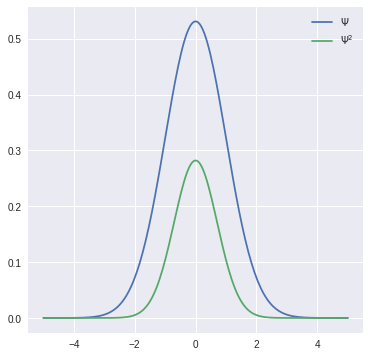

In [4]:
plt.style.use("seaborn")

# vibrational quantum number
n = 0

# set up figure and axis
fig, ax = plt.subplots(figsize=(6,6))

# Plot the wavefunction and probability density
ax.plot(x, harmosc_wfn(x, n), label="$\\Psi$")
ax.plot(x, harmosc_wfn(x, n)**2., label="$\\Psi^2$")

ax.legend()

In [5]:
# Save the figure based on the quantum number you used
fig.savefig("./figures/harmonic-oscillator-" + str(n) + ".png", dpi=300)

## Partner objective

Send your partner the notebook. They should run it to make sure it works, and then ask them to __plot up the next three ([3, 4, 5]) quantum numbers.__